In [5]:
%matplotlib inline

['Age' 'Cabin' 'Embarked' 'Fare' 'Name' 'Parch' 'PassengerId' 'Pclass'
 'Sex' 'SibSp' 'Survived' 'Ticket']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age         1309 non-null int32
Embarked    1309 non-null int64
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null int64
SibSp       1309 non-null int64
Survived    891 non-null float64
Title       1309 non-null int64
fam_size    1309 non-null int64
dtypes: float64(2), int32(1), int64(7)
memory usage: 107.4 KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:142: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


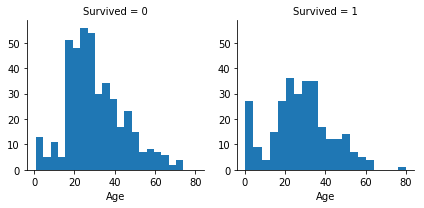

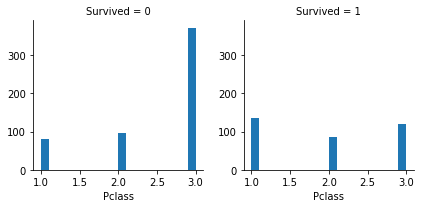

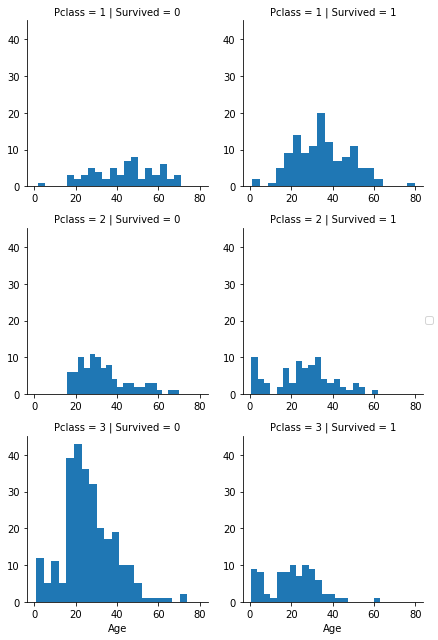

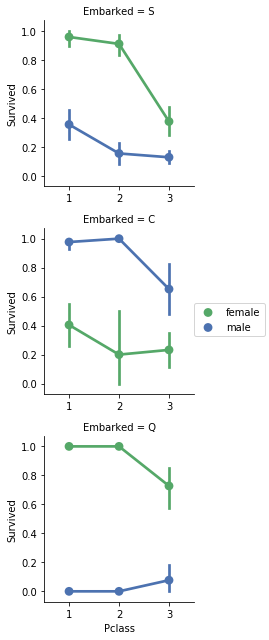

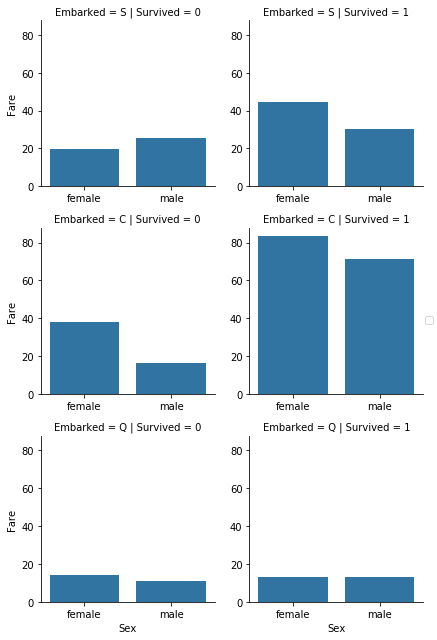

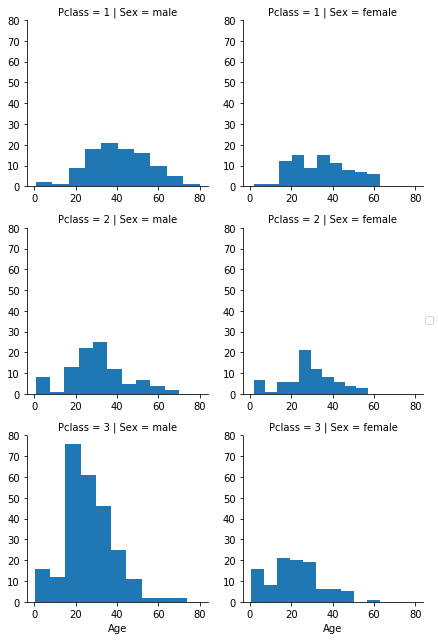

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

train = pd.read_csv('C:\\Users\\sarra\\Downloads\\train.csv')
test = pd.read_csv('C:\\Users\\sarra\\Downloads\\test.csv')

combine = [train,test]
complete=pd.concat(combine)

complete.describe()
complete.isnull().sum()

print(complete.columns.values)
complete.info()

train[['Pclass', 'Survived']].groupby(['Pclass'], 
     as_index=False).mean().sort_values(by='Survived', ascending=False)

train[['Sex', 'Survived']].groupby(['Sex'], 
     as_index=False).mean().sort_values(by='Survived', ascending=False)

train[['Parch', 'Survived']].groupby(['Parch'], 
     as_index=False).mean().sort_values(by='Survived', ascending=False)

train[['SibSp', 'Survived']].groupby(['SibSp'], 
     as_index=False).mean().sort_values(by='Survived', ascending=False)

graph1 = sns.FacetGrid(train, col='Survived')
graph1.map(plt.hist, 'Age', bins=20)

graph2 = sns.FacetGrid(train, col='Survived')
graph2.map(plt.hist, 'Pclass', bins=20)

graph3 = sns.FacetGrid(train, col='Survived', row='Pclass')
graph3.map(plt.hist, 'Age', bins=20)
graph3.add_legend()

graph4 = sns.FacetGrid(train, row='Embarked')
graph4.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
graph4.add_legend()

graph5 = sns.FacetGrid(train, row='Embarked', col='Survived')
graph5.map(sns.barplot, 'Sex', 'Fare', ci=None)
graph5.add_legend()

complete=complete.drop(['Ticket', 'Cabin'], axis=1)
complete['Title'] = complete.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
complete['Title'] = complete['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
complete['Title'] = complete['Title'].replace('Mlle', 'Miss')
complete['Title'] = complete['Title'].replace('Ms', 'Miss')
complete['Title'] = complete['Title'].replace('Mme', 'Mrs')

complete[['Title','Survived']].groupby(['Title'], as_index=False).mean()    

encoder = preprocessing.LabelEncoder()
complete['Title']=encoder.fit_transform(complete['Title'])
list(encoder.classes_)

complete=complete.drop(['PassengerId'], axis=1) 
complete=complete.drop(['Name'], axis=1)

encoder2 = preprocessing.LabelEncoder()
complete['Sex']=encoder2.fit_transform(complete['Sex'])
        
guess_age = np.zeros((2,3))

graph6 = sns.FacetGrid(train,row='Pclass',col='Sex')
graph6.map(plt.hist, 'Age')
graph6.add_legend()

for i in range(0,2):
    for j in range(0,3):
        guess=complete[(complete['Sex']==i)&\
                       (complete['Pclass']==j+1)]['Age'].dropna()
        age_median=guess.median()
        guess_age[i,j]=int(age_median/0.5+0.5)*0.5

for i in range(0,2):
    for j in range(0,3):
        complete.loc[(complete.Age.isnull())&(complete.Sex==i)&\
                     (complete.Pclass==j+1),'Age']=guess_age[i,j]
complete['Age']=complete['Age'].astype(int)           
complete.isnull().sum()

complete['age_band']=pd.cut(train['Age'],5)
complete[['age_band', 'Survived']].groupby(['age_band'], 
     as_index=False).mean().sort_values(by='age_band', ascending=True)

complete.loc[complete['Age']<=16,'Age']=0
complete.loc[(complete['Age']>16) & (complete['Age']<=32),'Age']=1
complete.loc[(complete['Age']>32) & (complete['Age']<=48),'Age']=2
complete.loc[(complete['Age']>48) & (complete['Age']<=64),'Age']=3
complete.loc[(complete['Age']>64) & (complete['Age']<=80),'Age']=4
    
complete=complete.drop(['age_band'],axis=1)

complete['fam_size']=complete['SibSp']+complete['Parch']+1

complete[['fam_size','Survived']].groupby(['fam_size'],
        as_index=False).mean().sort_values(by='Survived', ascending=False)

complete=complete.drop(['SibSp','Parch'])

freq_port = complete.Embarked.dropna().mode()[0]
complete['Embarked']=complete['Embarked'].fillna(freq_port)

encoder3=preprocessing.LabelEncoder()
complete['Embarked']=encoder3.fit_transform(complete['Embarked'])

complete[['Embarked','Survived']].groupby(['Embarked'],
        as_index=False).mean().sort_values(by='Survived')

complete['fare_band']=pd.qcut(complete['Fare'],4)
complete[['fare_band','Survived']].groupby(['fare_band'],
        as_index=False).mean().sort_values(by='fare_band')

complete.loc[complete['Fare']<=7.896,'Fare']=0
complete.loc[(complete['Fare']>7.896) & (complete['Fare']<=14.454),'Fare']=1
complete.loc[(complete['Fare']>14.454) & (complete['Fare']<=31.275),'Fare']=2
complete.loc[(complete['Fare']>31.275) & (complete['Fare']<=512.329),'Fare']=3

freq_fare = complete.Fare.dropna().mode()[0]
complete['Fare']=complete['Fare'].fillna(freq_fare)

complete=complete.drop(['fare_band'],axis=1)
complete.info()

X=complete.drop(['Survived'],axis=1)
Y=pd.DataFrame(complete['Survived'])

X_train=X.iloc[0:891,:]
Y_train=Y.iloc[0:891,:]
X_test=X.iloc[891:1309,:]
Y_test=Y.iloc[891:1310,:]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy=round(knn.score(X_train,Y_train)*100,2)
accuracy

final_prediction=pd.DataFrame({'PassengerId':test['PassengerId'], 
                               'Survived':Y_pred})
    
final_prediction.to_csv('C:\\Users\\sarra\\Downloads\\titanic_survival.csv', index=False)
